In [16]:
%matplotlib inline

#Taken from http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html#sphx-glr-auto-examples-applications-face-recognition-py
#Adapted by B.Tödtli


# Gesichtserkennung auf Eigenfaces 

Im Preprocessing (Feature-Engineering)-Schritt wird der Datensatz mit einer PCA vorbereitet.


## Laden des Datensatzes

In [26]:
from __future__ import print_function

import logging
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA



# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

Download the data, if not already on disk and load it as numpy arrays


In [18]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Grösse des Datensatzes:")
print("Anz. Zeilen: %d" % n_samples)
print("Anz. Features: %d" % n_features)
print("Anzahl Klassen (Personen): %d" % n_classes)

2017-05-03 16:10:47,070 Loading LFW people faces from /home/toedtli/scikit_learn_data/lfw_home


Grösse des Datensatzes:
Anz. Zeilen: 1288
Anz. Features: 1850
Anzahl Klassen (Personen): 7


Split into a training set and a test set using a stratified k fold


In [21]:
# split into a training and testing set
X_train_roh, X_test_roh, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

## Preprocessing mit Hauptkomponentenanalyse

Berechne nun eine PCA (eigenfaces) auf dem Datensatz und projiziere auf n_components=150 Komponenten:

In [40]:
n_components = 150

print("Extrahiere die top {0} Eigenfaces (aus {1} Bildern)".format(n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train_roh)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projiziere die Inputdaten auf die Eigenface-Basis")
X_train = pca.transform(X_train_roh)
X_test = pca.transform(X_test_roh)

Extrahiere die top 150 Eigenfaces (aus 966 Bildern)
Projiziere die Inputdaten auf die Eigenface-Basis


In [41]:
X_train.shape,y_train.shape,np.unique(y_train)

((966, 150), (966,), array([0, 1, 2, 3, 4, 5, 6]))

# Ihre Aufgabe: Trainieren des Klassifikators

** Aufgabe:** Trainieren Sie nun Ihren Klassifikator auf diesem Datensatz (X_train, y_train)


** Start Ihres Codes **

In [ ]:
import ...

In [ ]:
GridSearchCV(...)

In [ ]:
#Parameterplots:

In [ ]:
#Auswahl Ihres besten Trainierten Klassifikators
clf=...

In [42]:
#Vorerst mal: 
from sklearn.dummy import DummyClassifier
clf=DummyClassifier()
clf.fit(X_train,y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

** Ende Ihres Codes **

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion matrix:")
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
print('Genauigkeit: {0:1.2f}'.format(accuracy_score(y_test, y_pred)))

Confusion matrix:
[[ 1  2  0  6  2  0  2]
 [ 3 15  6 26  5  2  3]
 [ 2  5  0 13  1  3  3]
 [ 6 24 21 56 16 11 12]
 [ 1  5  4  6  2  1  6]
 [ 0  2  2  9  0  1  1]
 [ 9  5  1  9  5  4  3]]
Genauigkeit: 0.24


### Qualitative Evaluation der Vorhersagen mit matplotlib

In [53]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# Zeige die Bilder und die Vorhersagen für einige der Bilder
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

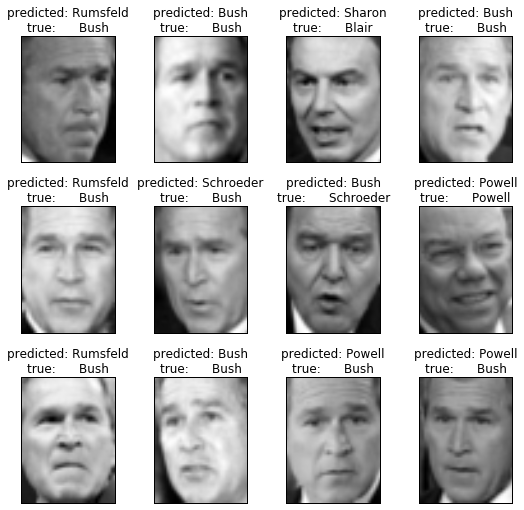

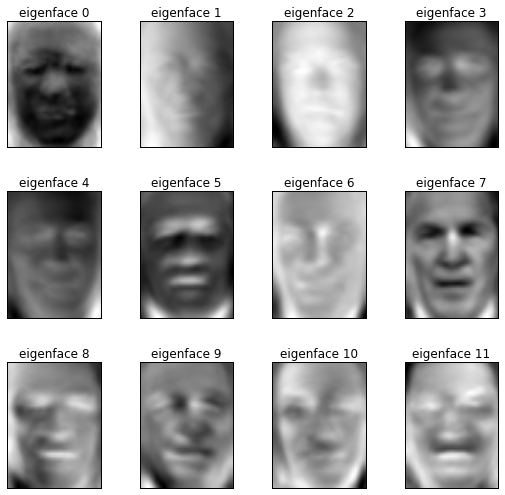

In [54]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test_roh, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()